In [1]:
import numpy as np
import pynbody
import matplotlib.pyplot as plt
import matplotlib as mpl
import pynbody.plot as pp
import pickle
import pandas as pd
import pynbody.plot.sph as sph

In [2]:
from Time import *

In [3]:
def cumulative_sfh(halo_num):
    age = 13.800797497330507
    s = pynbody.load('/home/christenc/Data/Sims/h148.cosmo50PLK.3072g/h148.cosmo50PLK.3072g3HbwK1BH/snapshots_200bkgdens/h148.cosmo50PLK.3072g3HbwK1BH.004096')
    halo = s.halos()[halo_num]
    try:
        sfh, bins = pynbody.plot.stars.sfh(halo, filename=None, massform=False, clear=False, legend=False, subplot=False, trange=False, bins=128)
        plt.clf()
    except ValueError:
        print('Cannot create SFH, only {len(halo.s)} star particles')
        raise

    sfhmstar = np.sum(sfh)
    bincenters = 0.5*(bins[1:]+bins[:-1])
    c_sfh = np.empty(shape=sfh.shape)
    for i in range(len(bincenters)):
        c_sfh[i] = np.sum(sfh[:i+1])/sfhmstar 
    return sfh, bincenters

In [4]:
datat1['z0haloid'].tolist()

[2.0,
 3.0,
 5.0,
 6.0,
 9.0,
 10.0,
 11.0,
 13.0,
 14.0,
 21.0,
 24.0,
 27.0,
 28.0,
 30.0,
 32.0,
 36.0,
 37.0,
 41.0,
 45.0,
 47.0,
 48.0,
 58.0,
 61.0,
 65.0,
 68.0,
 80.0,
 81.0,
 96.0,
 105.0,
 119.0,
 127.0,
 128.0,
 136.0,
 163.0,
 212.0,
 265.0,
 278.0,
 283.0,
 329.0,
 372.0,
 377.0,
 384.0,
 386.0,
 442.0,
 491.0,
 620.0,
 678.0,
 699.0,
 759.0,
 914.0,
 1004.0,
 2.0,
 3.0,
 5.0,
 6.0,
 9.0,
 10.0,
 11.0,
 13.0,
 14.0,
 21.0,
 24.0,
 27.0,
 28.0,
 30.0,
 32.0,
 36.0,
 37.0,
 41.0,
 45.0,
 47.0,
 48.0,
 58.0,
 61.0,
 65.0,
 68.0,
 80.0,
 81.0,
 96.0,
 105.0,
 119.0,
 127.0,
 128.0,
 136.0,
 163.0,
 212.0,
 265.0,
 278.0,
 283.0,
 329.0,
 372.0,
 377.0,
 384.0,
 386.0,
 442.0,
 491.0,
 620.0,
 678.0,
 699.0,
 759.0,
 914.0,
 1004.0,
 2.0,
 3.0,
 5.0,
 6.0,
 9.0,
 10.0,
 11.0,
 13.0,
 14.0,
 21.0,
 24.0,
 27.0,
 28.0,
 30.0,
 32.0,
 36.0,
 37.0,
 41.0,
 45.0,
 47.0,
 48.0,
 58.0,
 61.0,
 65.0,
 68.0,
 80.0,
 81.0,
 96.0,
 105.0,
 119.0,
 127.0,
 128.0,
 136.0,
 163.0,
 212.0,
 

Halo 2


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

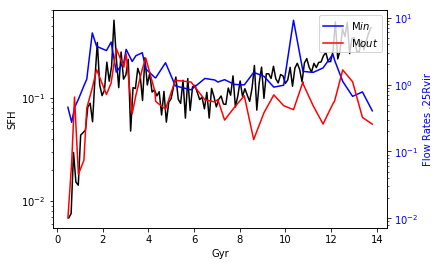

<Figure size 504x360 with 0 Axes>

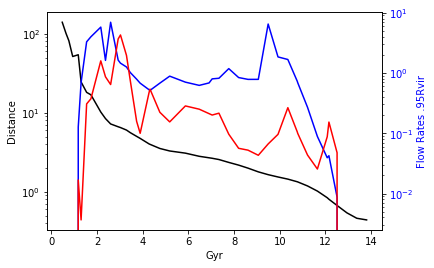

<Figure size 504x360 with 0 Axes>

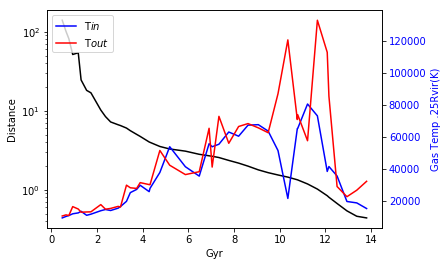

<Figure size 504x360 with 0 Axes>

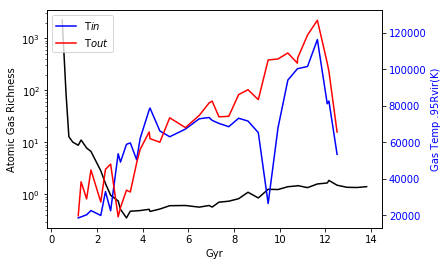

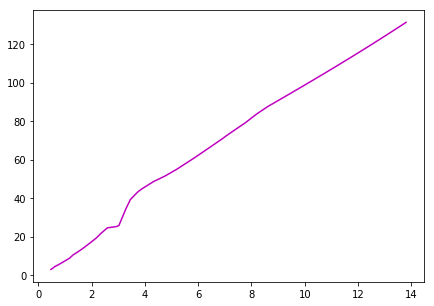

In [5]:
i = 2
print("Halo 2")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_23'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_23'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_91'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_91'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_23'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_23'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['mHI'][datat1['z0haloid']==i]/datat1['mstar'][datat1['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_91'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_91'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat1['time'][datat1['z0haloid']==i], datat1['Rvir'][datat1['z0haloid']==i], c='m')
plt.show()

Halo 3


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

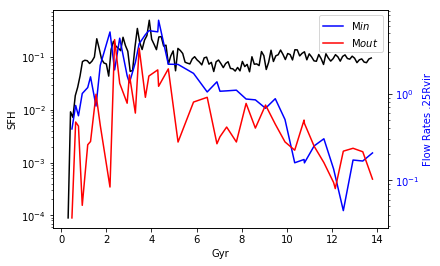

<Figure size 504x360 with 0 Axes>

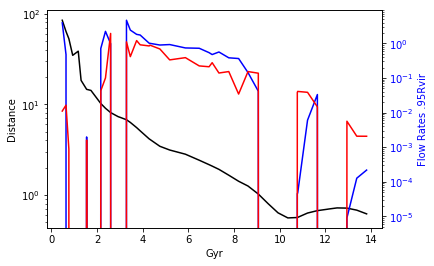

<Figure size 504x360 with 0 Axes>

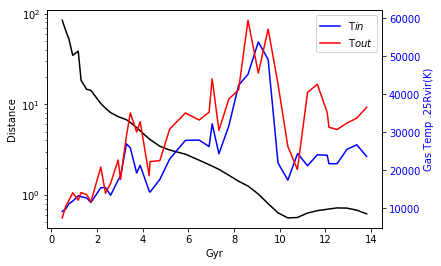

<Figure size 504x360 with 0 Axes>

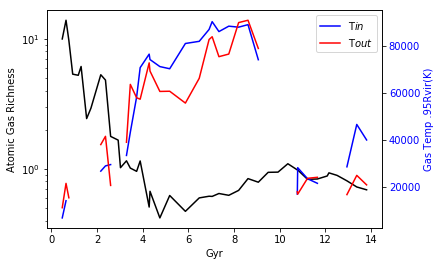

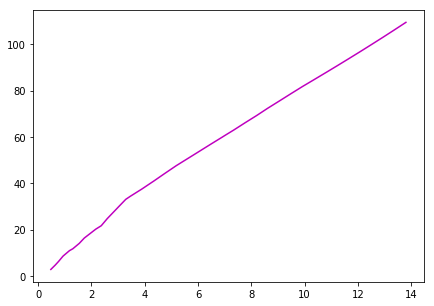

In [6]:
i = 3
print("Halo 3")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_23'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_23'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_91'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_91'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_23'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_23'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['mHI'][datat1['z0haloid']==i]/datat1['mstar'][datat1['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_91'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_91'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat1['time'][datat1['z0haloid']==i], datat1['Rvir'][datat1['z0haloid']==i], c='m')
plt.show()

Halo 5


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

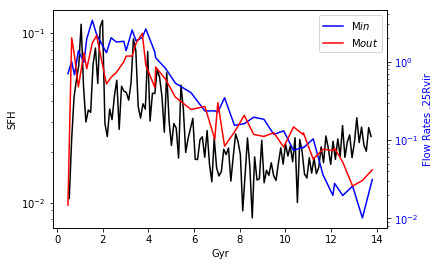

<Figure size 504x360 with 0 Axes>

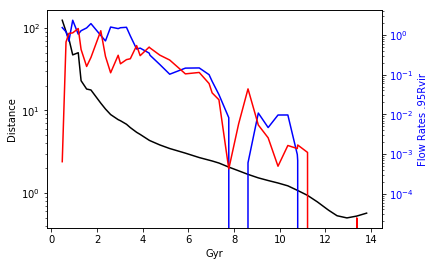

<Figure size 504x360 with 0 Axes>

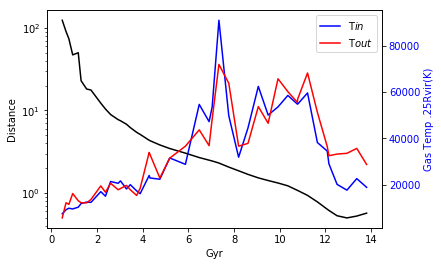

<Figure size 504x360 with 0 Axes>

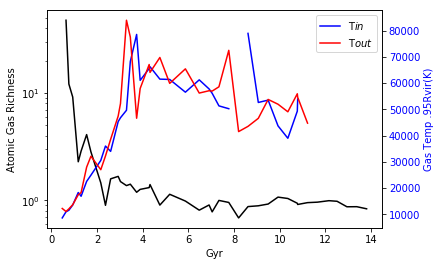

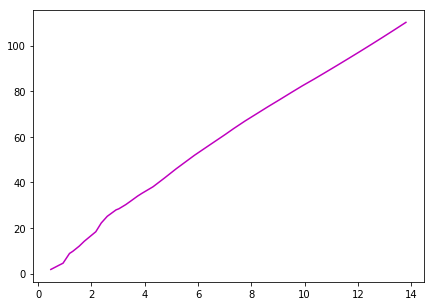

In [7]:
i = 5
print("Halo 5")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_23'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_23'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_91'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_91'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_23'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_23'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['mHI'][datat1['z0haloid']==i]/datat1['mstar'][datat1['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_91'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_91'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat1['time'][datat1['z0haloid']==i], datat1['Rvir'][datat1['z0haloid']==i], c='m')
plt.show()

Halo 6


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

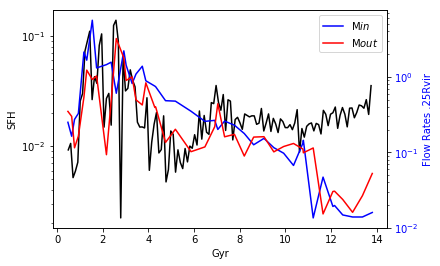

<Figure size 504x360 with 0 Axes>

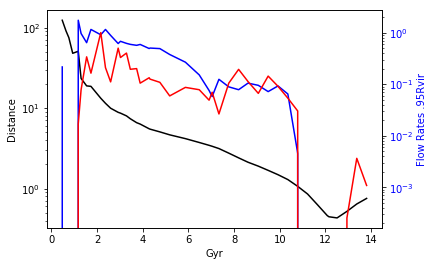

<Figure size 504x360 with 0 Axes>

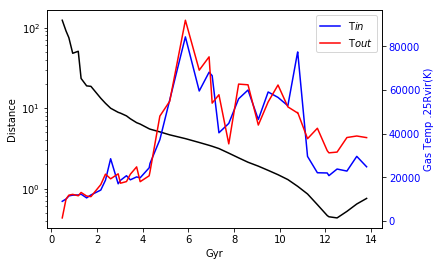

<Figure size 504x360 with 0 Axes>

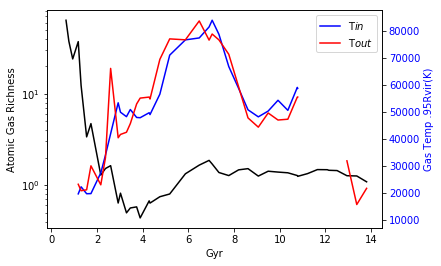

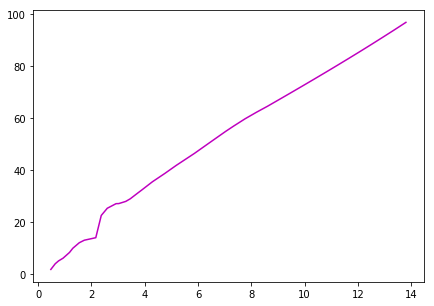

In [8]:
i = 6
print("Halo 6")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_23'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_23'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_91'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_91'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_23'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_23'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['mHI'][datat1['z0haloid']==i]/datat1['mstar'][datat1['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_91'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_91'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat1['time'][datat1['z0haloid']==i], datat1['Rvir'][datat1['z0haloid']==i], c='m')
plt.show()

Halo 9


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

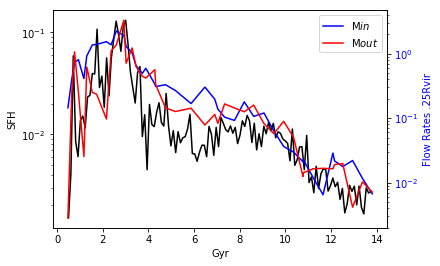

<Figure size 504x360 with 0 Axes>

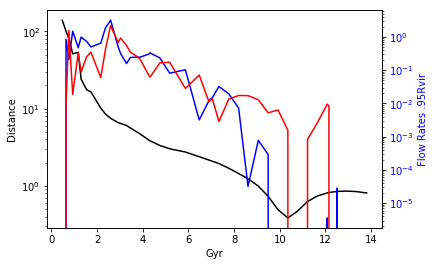

<Figure size 504x360 with 0 Axes>

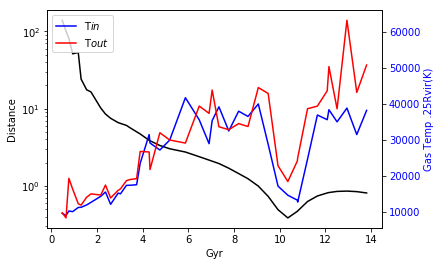

<Figure size 504x360 with 0 Axes>

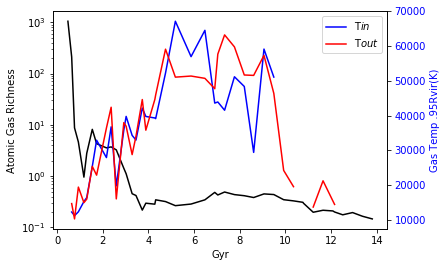

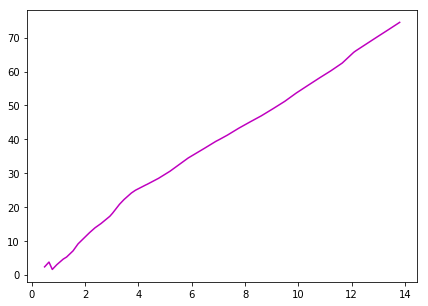

In [9]:
i = 9
print("Halo 9")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_23'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_23'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_91'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_91'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_23'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_23'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['mHI'][datat1['z0haloid']==i]/datat1['mstar'][datat1['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_91'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_91'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat1['time'][datat1['z0haloid']==i], datat1['Rvir'][datat1['z0haloid']==i], c='m')
plt.show()

Halo 10


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

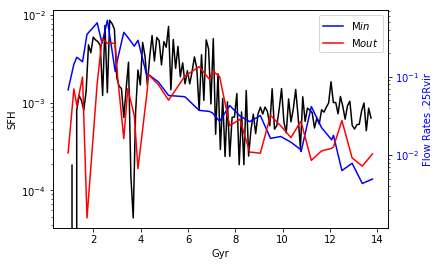

<Figure size 504x360 with 0 Axes>

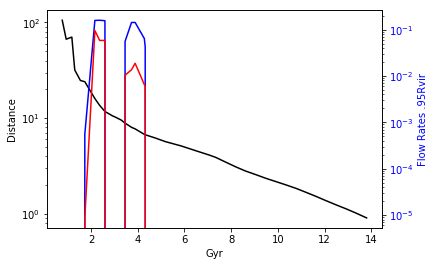

<Figure size 504x360 with 0 Axes>

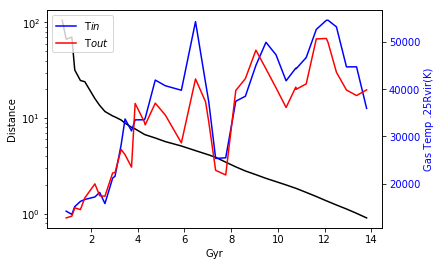

<Figure size 504x360 with 0 Axes>

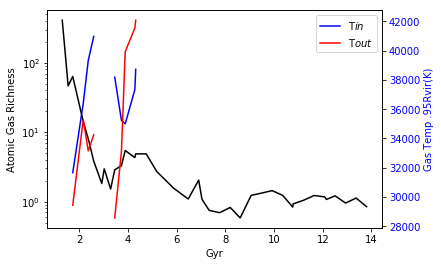

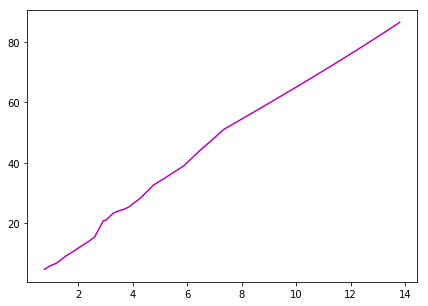

In [10]:
i = 10
print("Halo 10")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_23'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_23'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_91'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_91'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_23'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_23'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['mHI'][datat1['z0haloid']==i]/datat1['mstar'][datat1['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_91'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_91'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat1['time'][datat1['z0haloid']==i], datat1['Rvir'][datat1['z0haloid']==i], c='m')
plt.show()

Halo 11


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

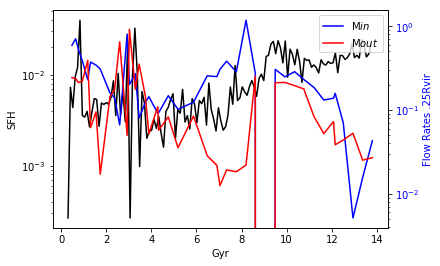

<Figure size 504x360 with 0 Axes>

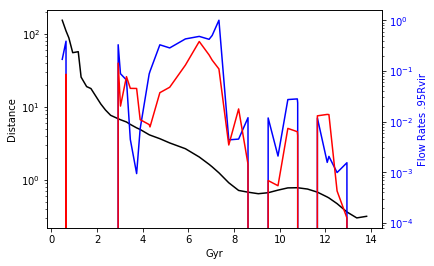

<Figure size 504x360 with 0 Axes>

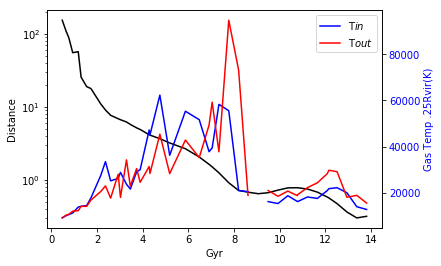

<Figure size 504x360 with 0 Axes>

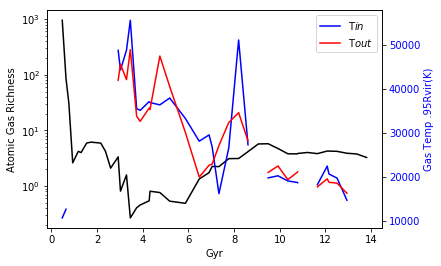

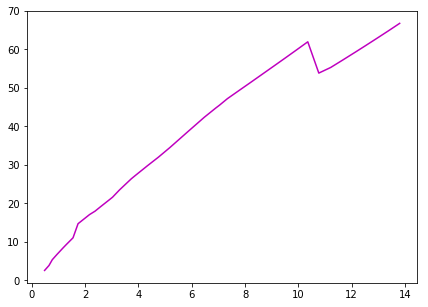

In [11]:
i = 11
print("Halo 11")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_23'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_23'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_91'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_91'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_23'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_23'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['mHI'][datat1['z0haloid']==i]/datat1['mstar'][datat1['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_91'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_91'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat1['time'][datat1['z0haloid']==i], datat1['Rvir'][datat1['z0haloid']==i], c='m')
plt.show()

Halo 13


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

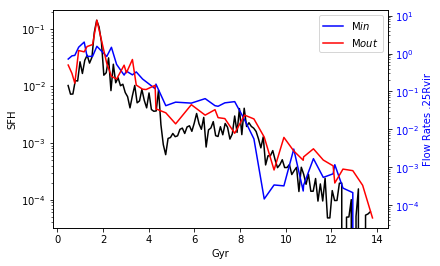

<Figure size 504x360 with 0 Axes>

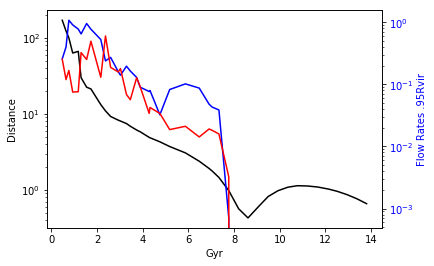

<Figure size 504x360 with 0 Axes>

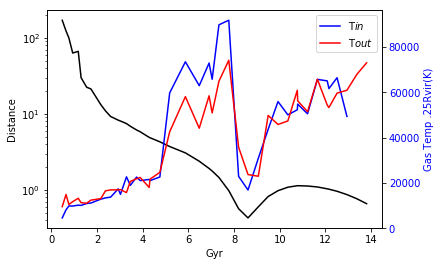

<Figure size 504x360 with 0 Axes>

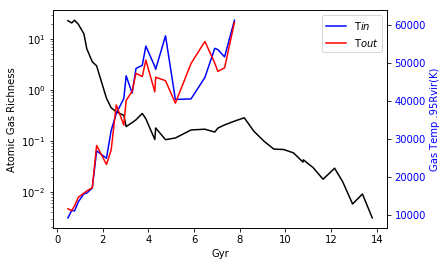

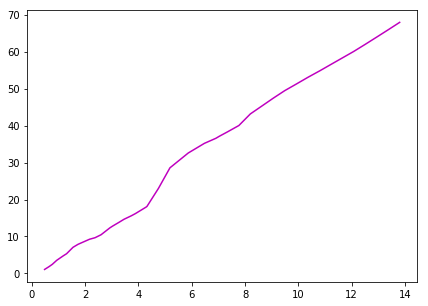

In [12]:
i = 13
print("Halo 13")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_23'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_23'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_91'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_91'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_23'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_23'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['mHI'][datat1['z0haloid']==i]/datat1['mstar'][datat1['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_91'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_91'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat1['time'][datat1['z0haloid']==i], datat1['Rvir'][datat1['z0haloid']==i], c='m')
plt.show()

Halo 14


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

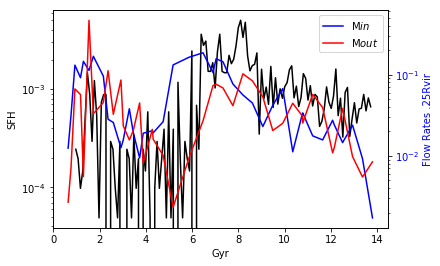

<Figure size 504x360 with 0 Axes>

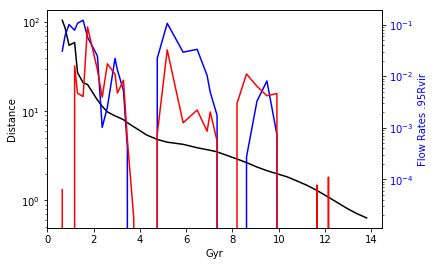

<Figure size 504x360 with 0 Axes>

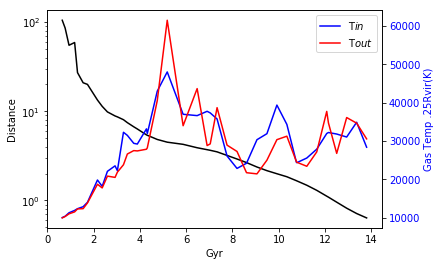

<Figure size 504x360 with 0 Axes>

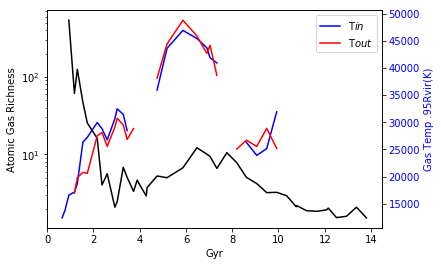

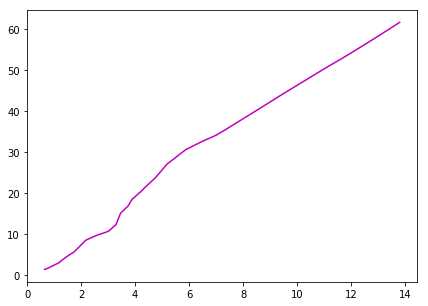

In [13]:
i = 14
print("Halo 14")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_23'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_23'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_91'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_91'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_23'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_23'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['mHI'][datat1['z0haloid']==i]/datat1['mstar'][datat1['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_91'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_91'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat1['time'][datat1['z0haloid']==i], datat1['Rvir'][datat1['z0haloid']==i], c='m')
plt.show()

Halo 21


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

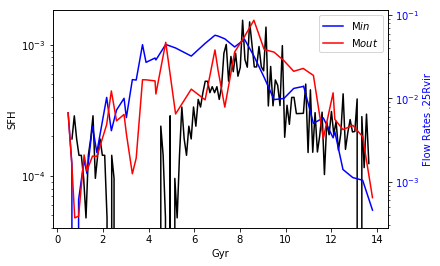

<Figure size 504x360 with 0 Axes>

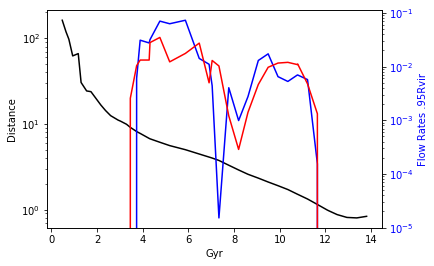

<Figure size 504x360 with 0 Axes>

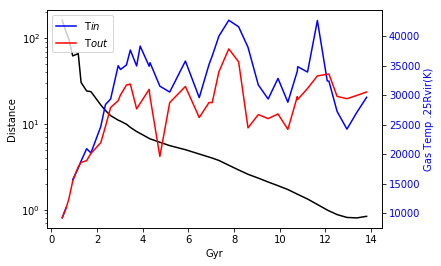

<Figure size 504x360 with 0 Axes>

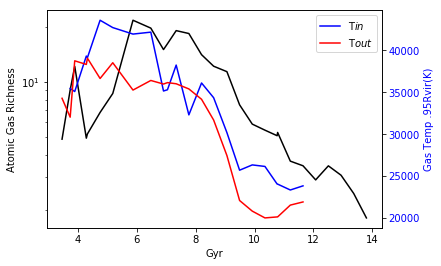

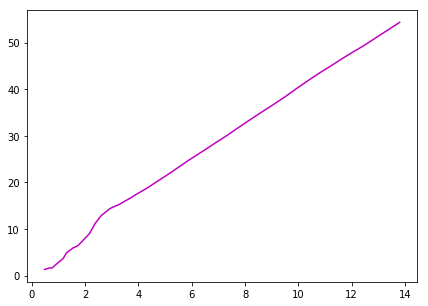

In [14]:
i = 21
print("Halo 21")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_23'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_23'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_91'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_91'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_23'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_23'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['mHI'][datat1['z0haloid']==i]/datat1['mstar'][datat1['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_91'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_91'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat1['time'][datat1['z0haloid']==i], datat1['Rvir'][datat1['z0haloid']==i], c='m')
plt.show()

Halo 24


/home/engelhar/.local/lib/python3.5/site-packages/matplotlib/ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

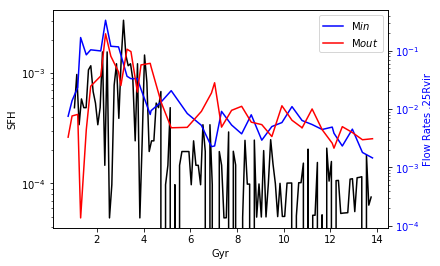

<Figure size 504x360 with 0 Axes>

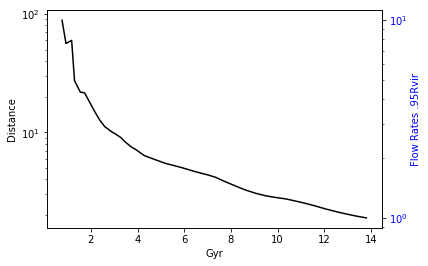

<Figure size 504x360 with 0 Axes>

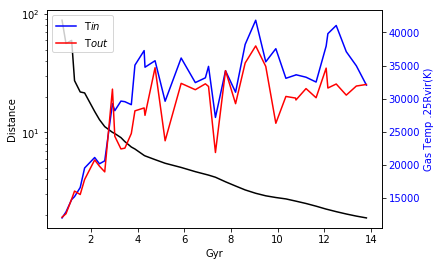

<Figure size 504x360 with 0 Axes>

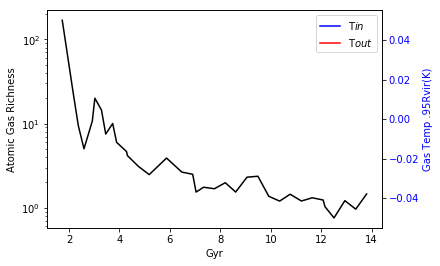

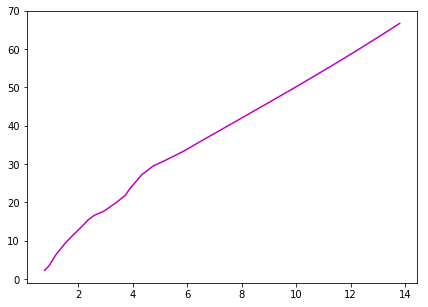

In [15]:
i = 24
print("Halo 24")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_23'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_23'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_91'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_91'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_23'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_23'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['mHI'][datat1['z0haloid']==i]/datat1['mstar'][datat1['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_91'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_91'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat1['time'][datat1['z0haloid']==i], datat1['Rvir'][datat1['z0haloid']==i], c='m')
plt.show()

Halo 27


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

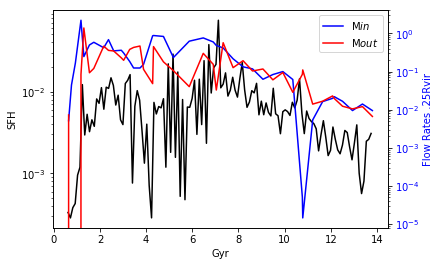

<Figure size 504x360 with 0 Axes>

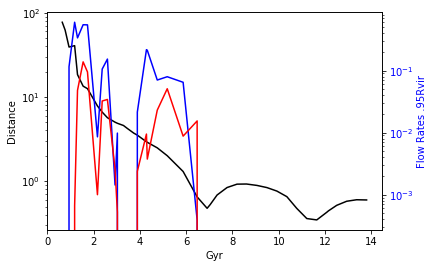

<Figure size 504x360 with 0 Axes>

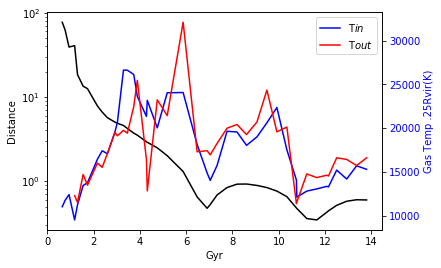

<Figure size 504x360 with 0 Axes>

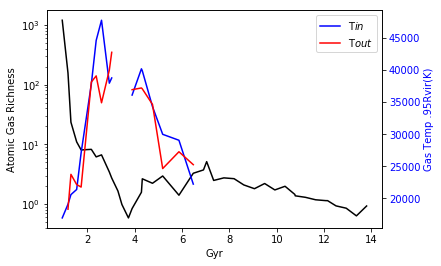

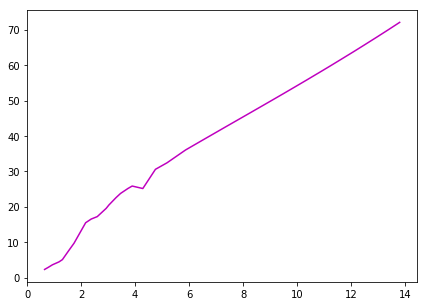

In [16]:
i = 27
print("Halo 27")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_23'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_23'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_91'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_91'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_23'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_23'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['mHI'][datat1['z0haloid']==i]/datat1['mstar'][datat1['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_91'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_91'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat1['time'][datat1['z0haloid']==i], datat1['Rvir'][datat1['z0haloid']==i], c='m')
plt.show()

Halo 28


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

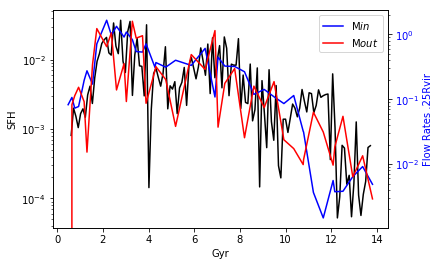

<Figure size 504x360 with 0 Axes>

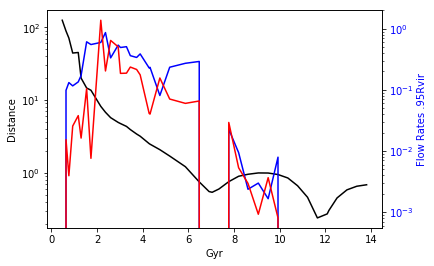

<Figure size 504x360 with 0 Axes>

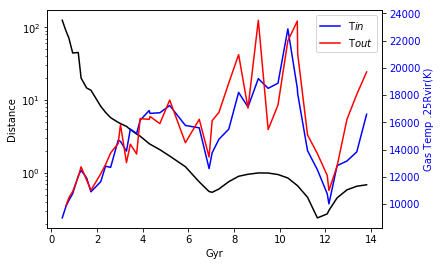

<Figure size 504x360 with 0 Axes>

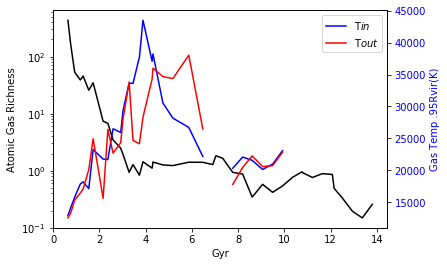

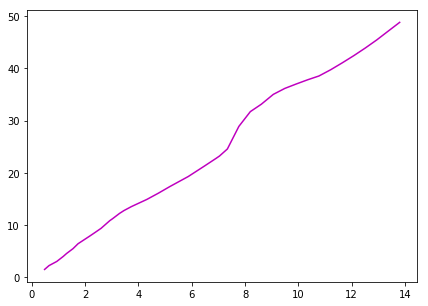

In [17]:
i = 28
print("Halo 28")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_23'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_23'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_91'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_91'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_23'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_23'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['mHI'][datat1['z0haloid']==i]/datat1['mstar'][datat1['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_91'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_91'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat1['time'][datat1['z0haloid']==i], datat1['Rvir'][datat1['z0haloid']==i], c='m')
plt.show()

Halo 30


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

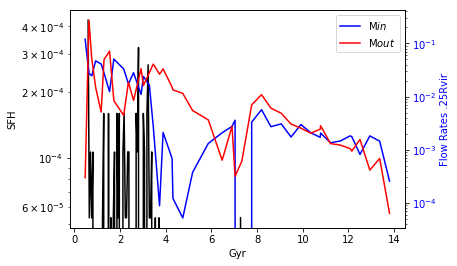

<Figure size 504x360 with 0 Axes>

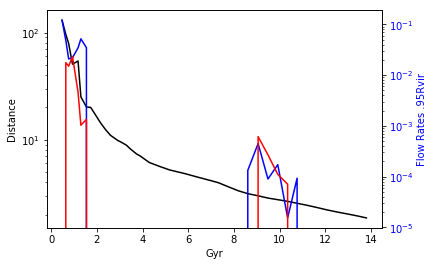

<Figure size 504x360 with 0 Axes>

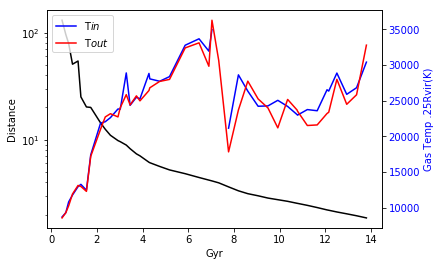

<Figure size 504x360 with 0 Axes>

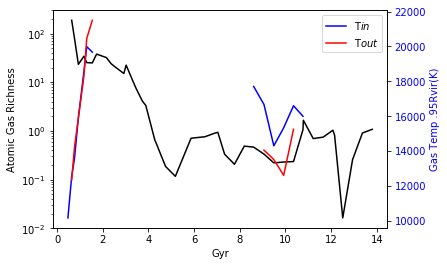

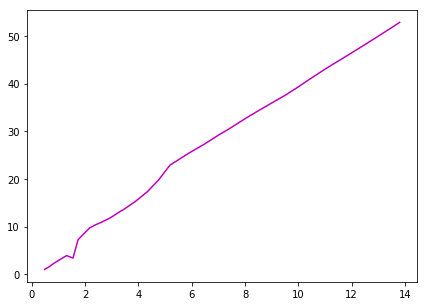

In [18]:
i = 30
print("Halo 30")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_23'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_23'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_91'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_91'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_23'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_23'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['mHI'][datat1['z0haloid']==i]/datat1['mstar'][datat1['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_91'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_91'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat1['time'][datat1['z0haloid']==i], datat1['Rvir'][datat1['z0haloid']==i], c='m')
plt.show()

Halo 32


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

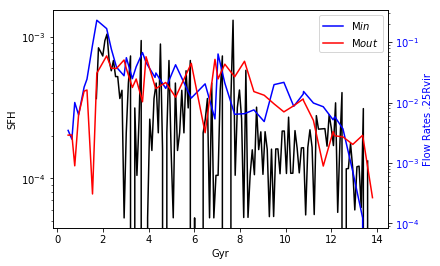

<Figure size 504x360 with 0 Axes>

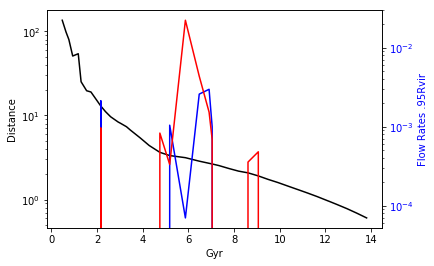

<Figure size 504x360 with 0 Axes>

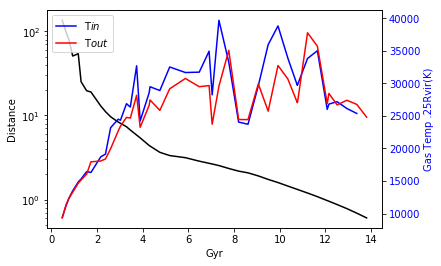

<Figure size 504x360 with 0 Axes>

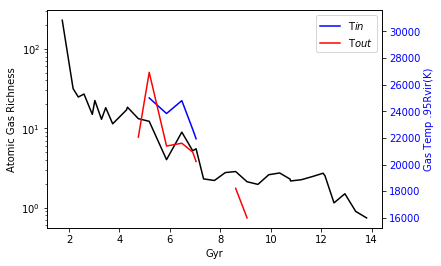

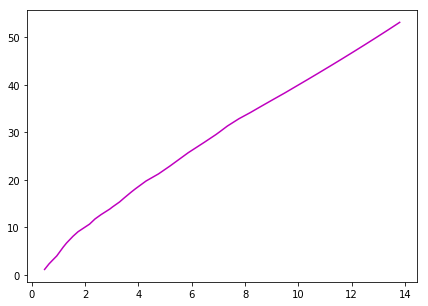

In [19]:
i = 32
print("Halo 32")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_23'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_23'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_91'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_91'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_23'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_23'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['mHI'][datat1['z0haloid']==i]/datat1['mstar'][datat1['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_91'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_91'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat1['time'][datat1['z0haloid']==i], datat1['Rvir'][datat1['z0haloid']==i], c='m')
plt.show()

Halo 36


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

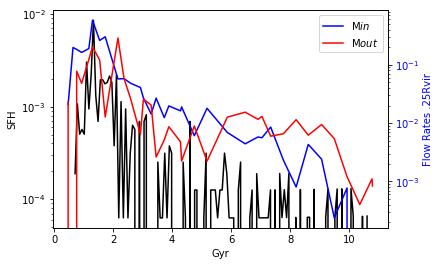

<Figure size 504x360 with 0 Axes>

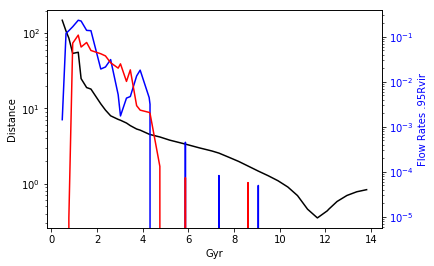

<Figure size 504x360 with 0 Axes>

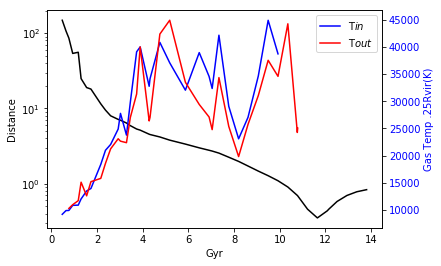

<Figure size 504x360 with 0 Axes>

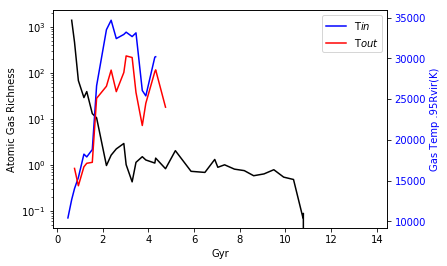

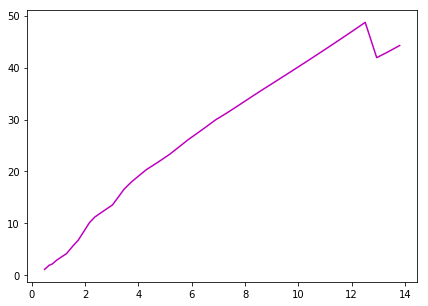

In [20]:
i = 36
print("Halo 36")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_23'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_23'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_91'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_91'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_23'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_23'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['mHI'][datat1['z0haloid']==i]/datat1['mstar'][datat1['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_91'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_91'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat1['time'][datat1['z0haloid']==i], datat1['Rvir'][datat1['z0haloid']==i], c='m')
plt.show()

Halo 37


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

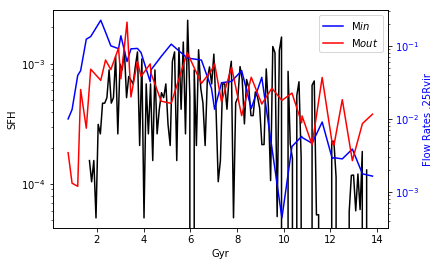

<Figure size 504x360 with 0 Axes>

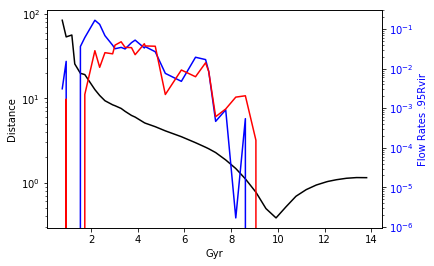

<Figure size 504x360 with 0 Axes>

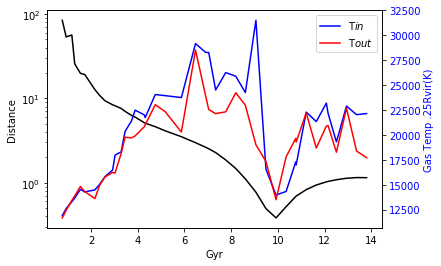

<Figure size 504x360 with 0 Axes>

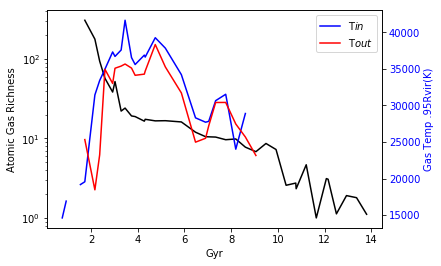

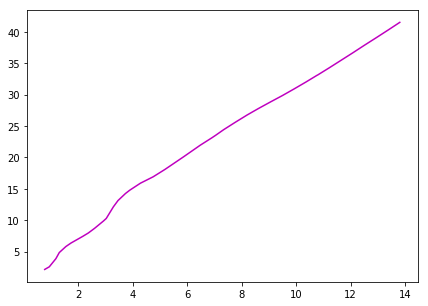

In [21]:
i = 37
print("Halo 37")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_23'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_23'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_91'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_91'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_23'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_23'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['mHI'][datat1['z0haloid']==i]/datat1['mstar'][datat1['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_91'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_91'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat1['time'][datat1['z0haloid']==i], datat1['Rvir'][datat1['z0haloid']==i], c='m')
plt.show()

Halo 41


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

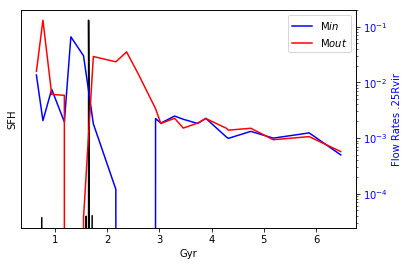

<Figure size 504x360 with 0 Axes>

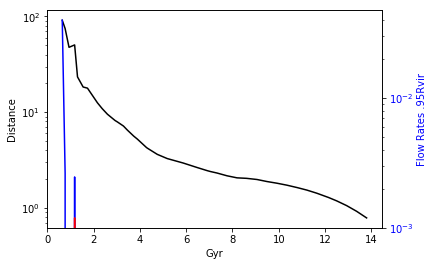

<Figure size 504x360 with 0 Axes>

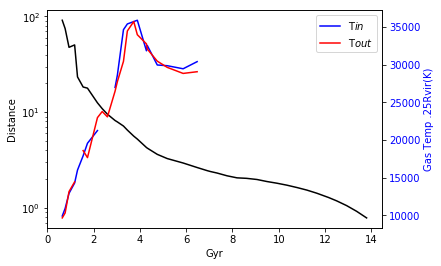

<Figure size 504x360 with 0 Axes>

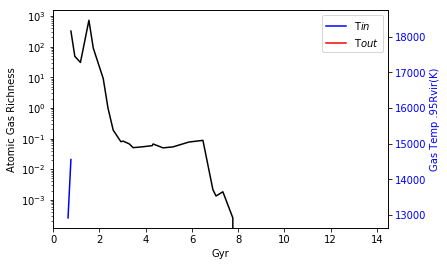

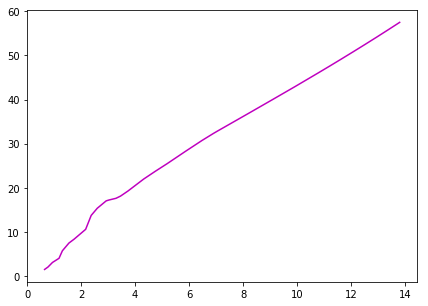

In [22]:
i = 41
print("Halo 41")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_23'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_23'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_91'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_91'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_23'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_23'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['mHI'][datat1['z0haloid']==i]/datat1['mstar'][datat1['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_91'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_91'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat1['time'][datat1['z0haloid']==i], datat1['Rvir'][datat1['z0haloid']==i], c='m')
plt.show()

Halo 45


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

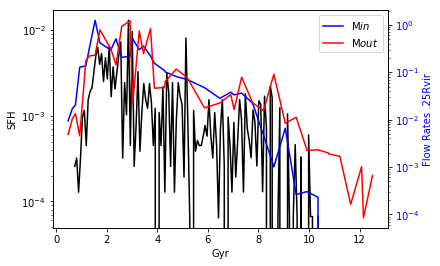

<Figure size 504x360 with 0 Axes>

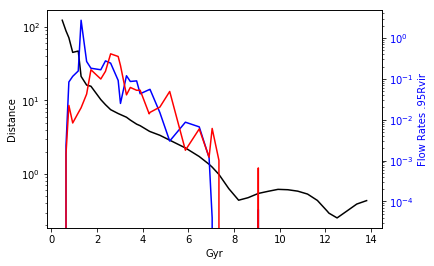

<Figure size 504x360 with 0 Axes>

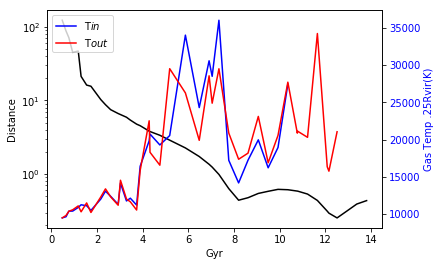

<Figure size 504x360 with 0 Axes>

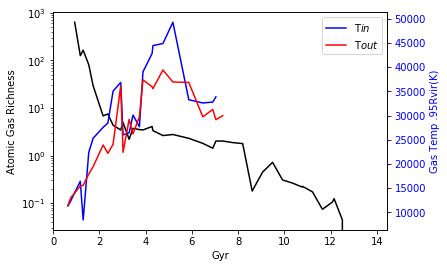

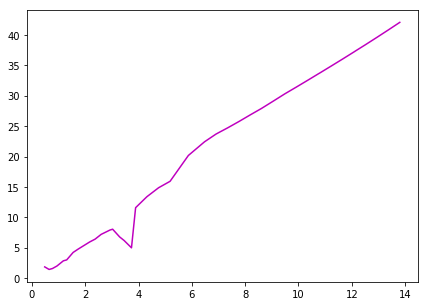

In [23]:
i = 45
print("Halo 45")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_23'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_23'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_91'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_91'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_23'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_23'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['mHI'][datat1['z0haloid']==i]/datat1['mstar'][datat1['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_91'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_91'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat1['time'][datat1['z0haloid']==i], datat1['Rvir'][datat1['z0haloid']==i], c='m')
plt.show()

Halo 48


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

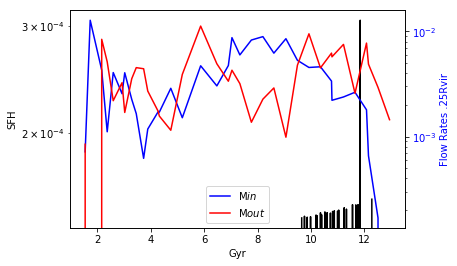

<Figure size 504x360 with 0 Axes>

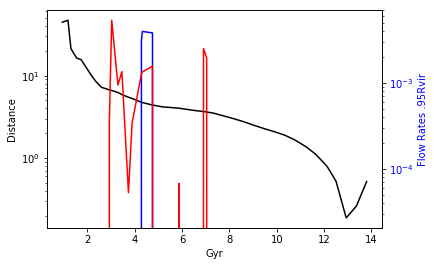

<Figure size 504x360 with 0 Axes>

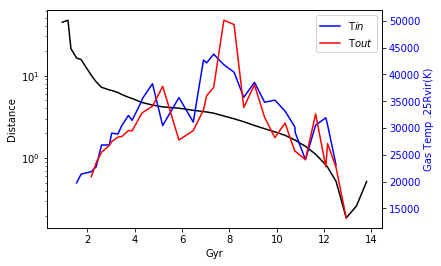

<Figure size 504x360 with 0 Axes>

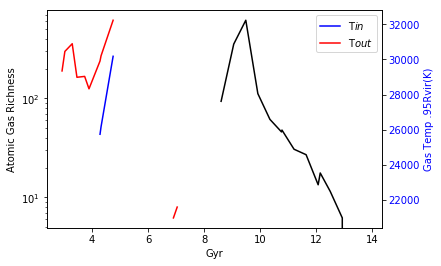

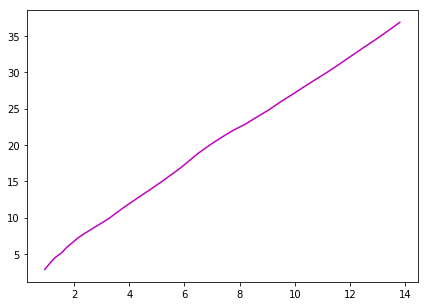

In [25]:
i = 48
print("Halo 48")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_23'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_23'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_91'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_91'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_23'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_23'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['mHI'][datat1['z0haloid']==i]/datat1['mstar'][datat1['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_91'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_91'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat1['time'][datat1['z0haloid']==i], datat1['Rvir'][datat1['z0haloid']==i], c='m')
plt.show()

Halo 58


/home/engelhar/.local/lib/python3.5/site-packages/matplotlib/ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

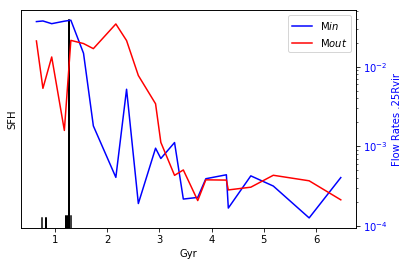

<Figure size 504x360 with 0 Axes>

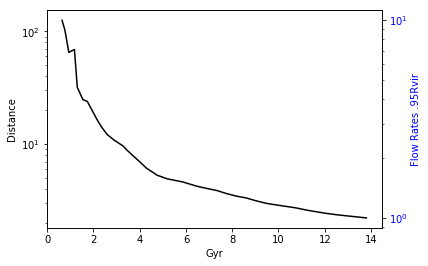

<Figure size 504x360 with 0 Axes>

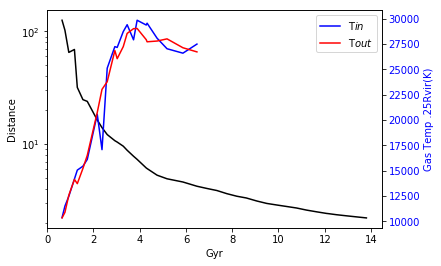

<Figure size 504x360 with 0 Axes>

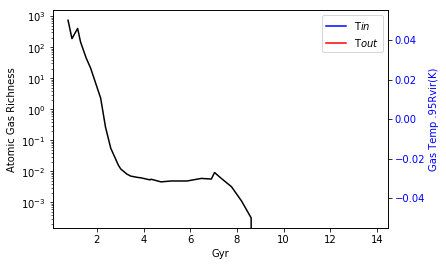

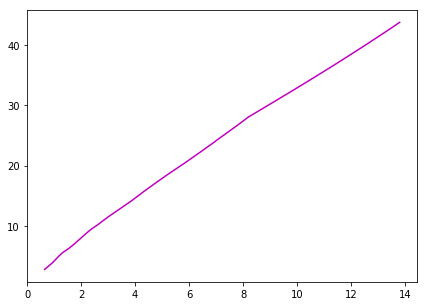

In [26]:
i = 58
print("Halo 58")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_23'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_23'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_91'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_91'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_23'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_23'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['mHI'][datat1['z0haloid']==i]/datat1['mstar'][datat1['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_91'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_91'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat1['time'][datat1['z0haloid']==i], datat1['Rvir'][datat1['z0haloid']==i], c='m')
plt.show()

Halo 61


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

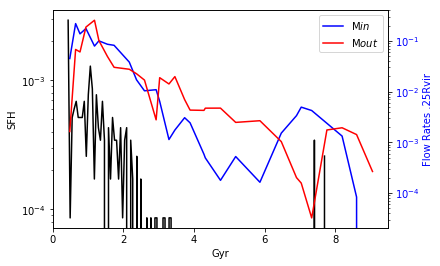

<Figure size 504x360 with 0 Axes>

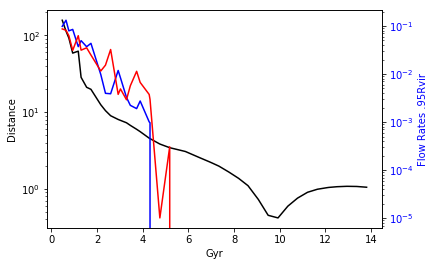

<Figure size 504x360 with 0 Axes>

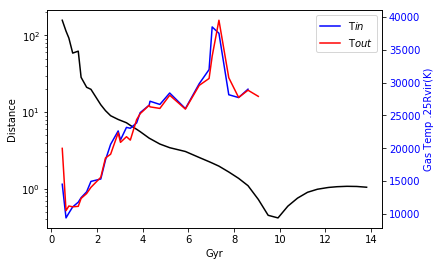

<Figure size 504x360 with 0 Axes>

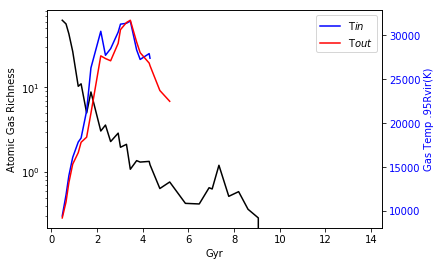

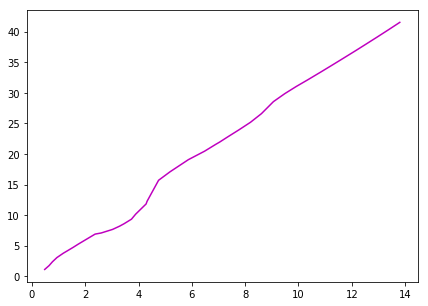

In [27]:
i = 61
print("Halo 61")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_23'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_23'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_91'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_91'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_23'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_23'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['mHI'][datat1['z0haloid']==i]/datat1['mstar'][datat1['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_91'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_91'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat1['time'][datat1['z0haloid']==i], datat1['Rvir'][datat1['z0haloid']==i], c='m')
plt.show()

Halo 68


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

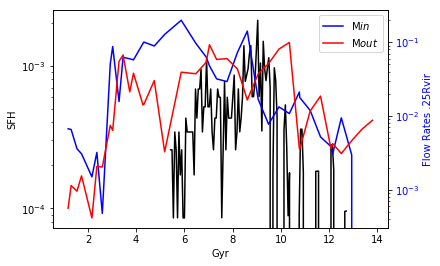

<Figure size 504x360 with 0 Axes>

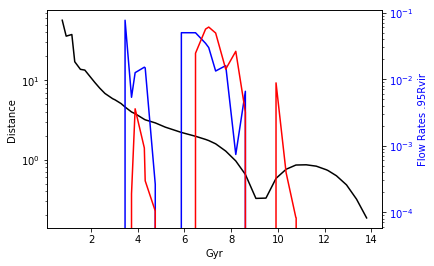

<Figure size 504x360 with 0 Axes>

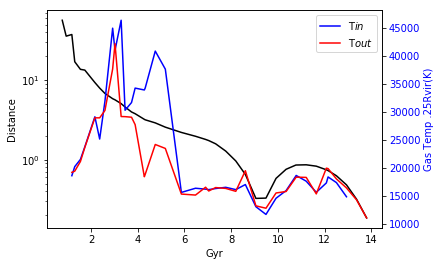

<Figure size 504x360 with 0 Axes>

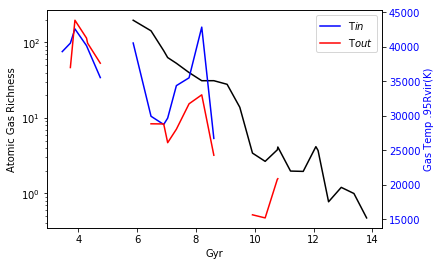

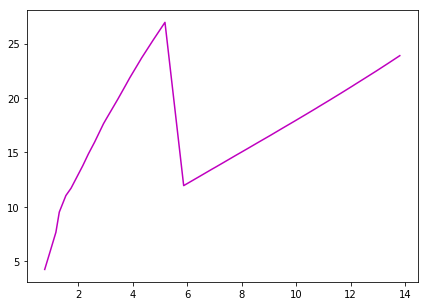

In [29]:
i = 68
print("Halo 68")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_23'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_23'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_91'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_91'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_23'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_23'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['mHI'][datat1['z0haloid']==i]/datat1['mstar'][datat1['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_91'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_91'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat1['time'][datat1['z0haloid']==i], datat1['Rvir'][datat1['z0haloid']==i], c='m')
plt.show()

Halo 80


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

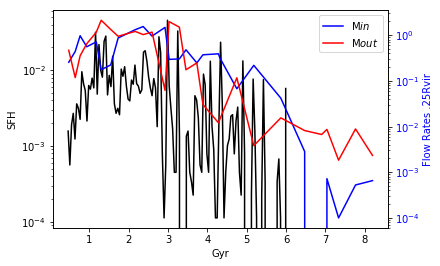

<Figure size 504x360 with 0 Axes>

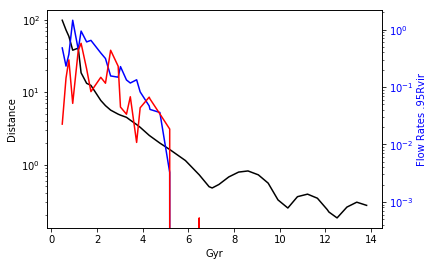

<Figure size 504x360 with 0 Axes>

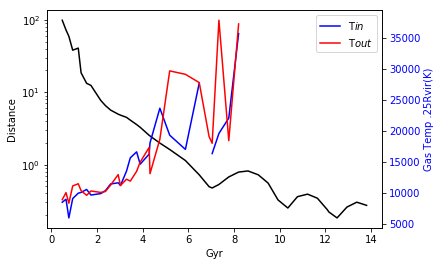

<Figure size 504x360 with 0 Axes>

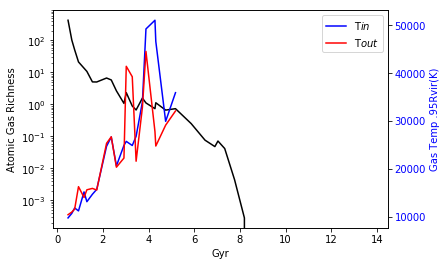

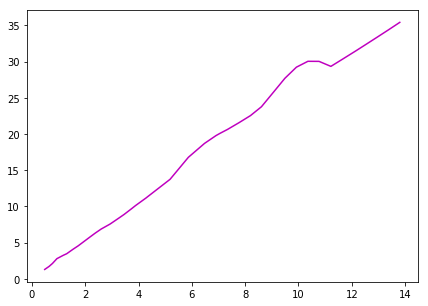

In [30]:
i = 80
print("Halo 80")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_23'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_23'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_91'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_91'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_23'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_23'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['mHI'][datat1['z0haloid']==i]/datat1['mstar'][datat1['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_91'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_91'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat1['time'][datat1['z0haloid']==i], datat1['Rvir'][datat1['z0haloid']==i], c='m')
plt.show()

Halo 96


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

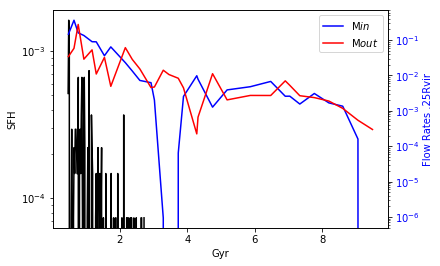

<Figure size 504x360 with 0 Axes>

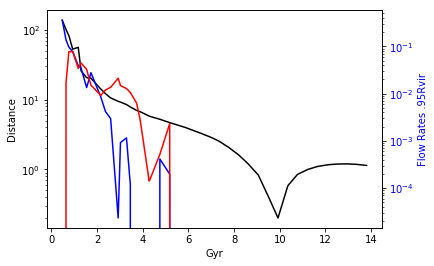

<Figure size 504x360 with 0 Axes>

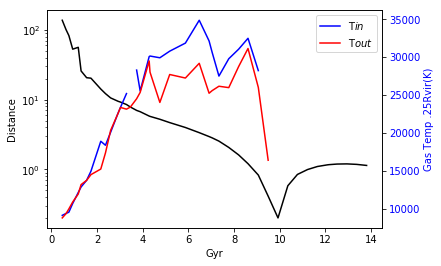

<Figure size 504x360 with 0 Axes>

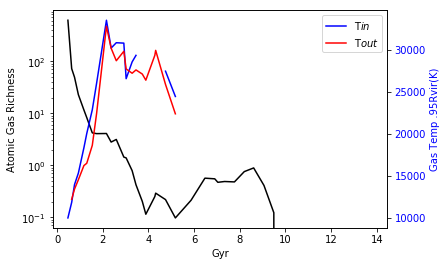

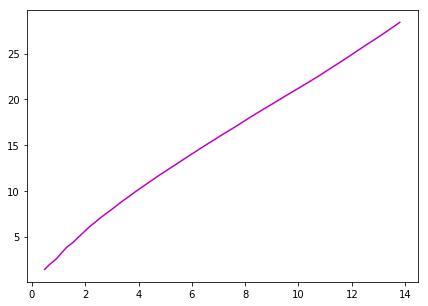

In [32]:
i = 96
print("Halo 96")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_23'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_23'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_91'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_91'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_23'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_23'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['mHI'][datat1['z0haloid']==i]/datat1['mstar'][datat1['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_91'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_91'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat1['time'][datat1['z0haloid']==i], datat1['Rvir'][datat1['z0haloid']==i], c='m')
plt.show()

Halo 127


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

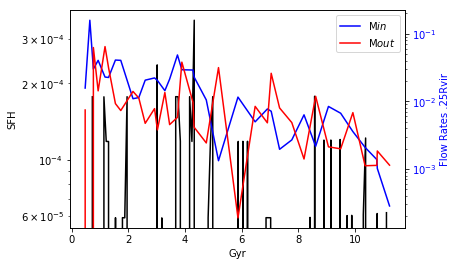

<Figure size 504x360 with 0 Axes>

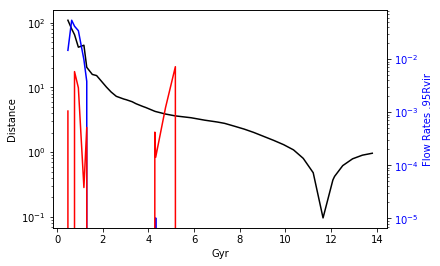

<Figure size 504x360 with 0 Axes>

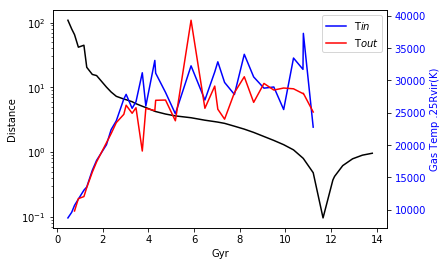

<Figure size 504x360 with 0 Axes>

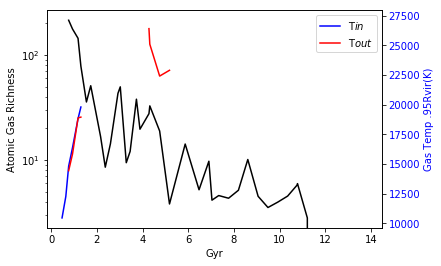

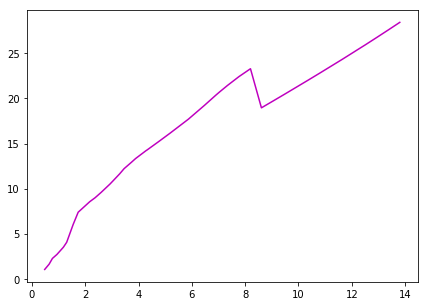

In [35]:
i = 127
print("Halo 127")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_23'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_23'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_91'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_91'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_23'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_23'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['mHI'][datat1['z0haloid']==i]/datat1['mstar'][datat1['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_91'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_91'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat1['time'][datat1['z0haloid']==i], datat1['Rvir'][datat1['z0haloid']==i], c='m')
plt.show()

Halo 128


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

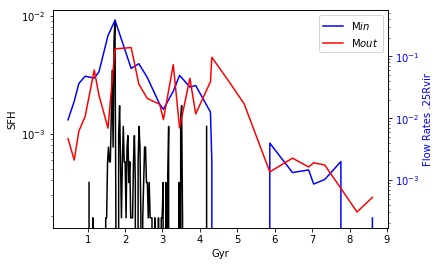

<Figure size 504x360 with 0 Axes>

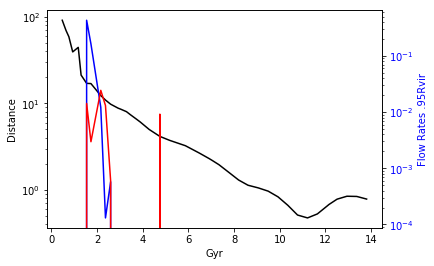

<Figure size 504x360 with 0 Axes>

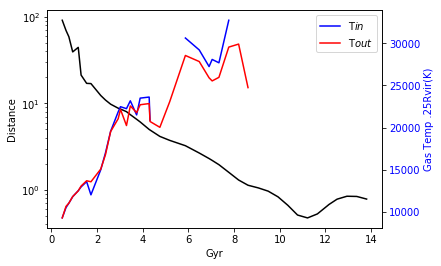

<Figure size 504x360 with 0 Axes>

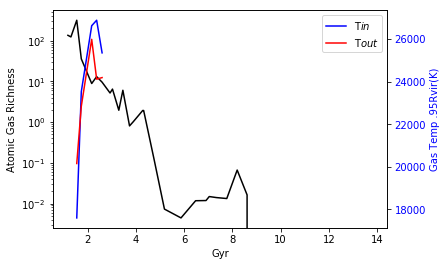

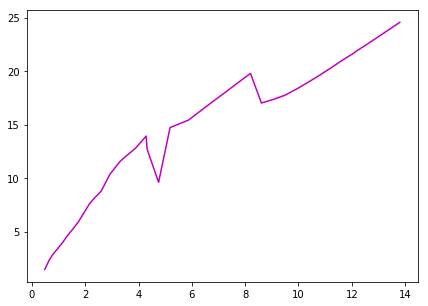

In [36]:
i = 128
print("Halo 128")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_23'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_23'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_91'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_91'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_23'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_23'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['mHI'][datat1['z0haloid']==i]/datat1['mstar'][datat1['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_91'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_91'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat1['time'][datat1['z0haloid']==i], datat1['Rvir'][datat1['z0haloid']==i], c='m')
plt.show()

Halo 136


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

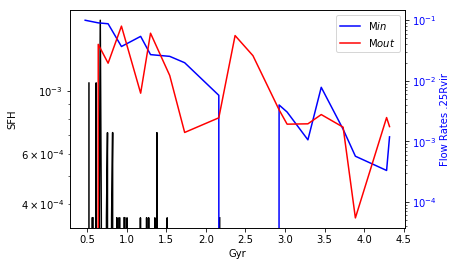

<Figure size 504x360 with 0 Axes>

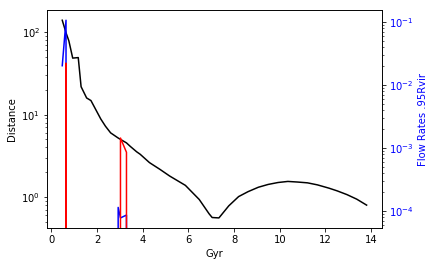

<Figure size 504x360 with 0 Axes>

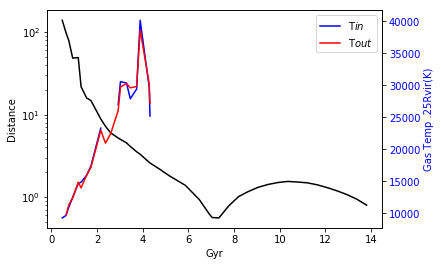

<Figure size 504x360 with 0 Axes>

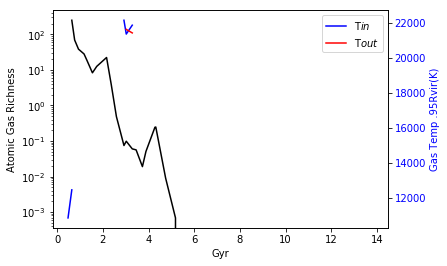

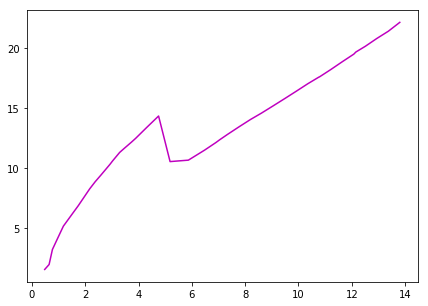

In [37]:
i = 136
print("Halo 136")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_23'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_23'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_91'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_91'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_23'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_23'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['mHI'][datat1['z0haloid']==i]/datat1['mstar'][datat1['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_91'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_91'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat1['time'][datat1['z0haloid']==i], datat1['Rvir'][datat1['z0haloid']==i], c='m')
plt.show()

Halo 163


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

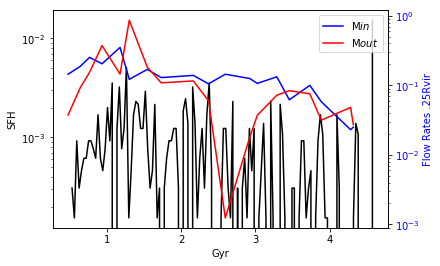

<Figure size 504x360 with 0 Axes>

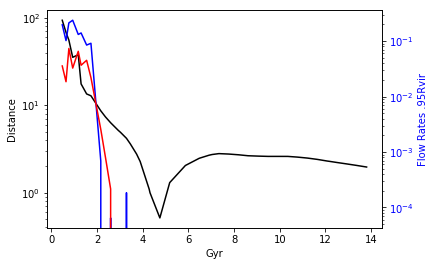

<Figure size 504x360 with 0 Axes>

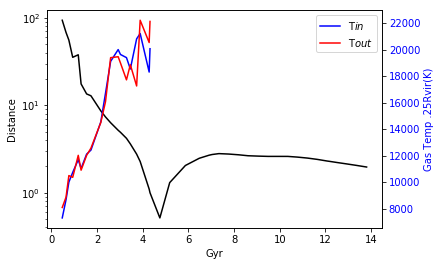

<Figure size 504x360 with 0 Axes>

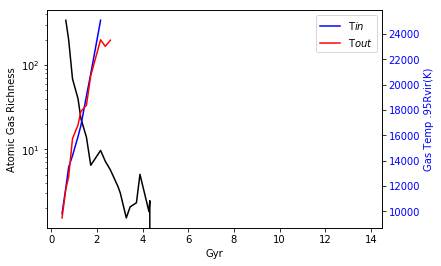

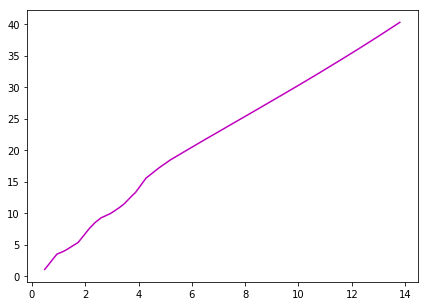

In [38]:
i = 163
print("Halo 163")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_23'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_23'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_91'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_91'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_23'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_23'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['mHI'][datat1['z0haloid']==i]/datat1['mstar'][datat1['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_91'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_91'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat1['time'][datat1['z0haloid']==i], datat1['Rvir'][datat1['z0haloid']==i], c='m')
plt.show()

Halo 212


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

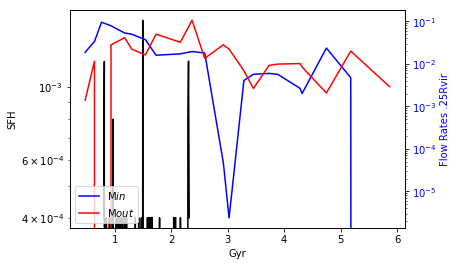

<Figure size 504x360 with 0 Axes>

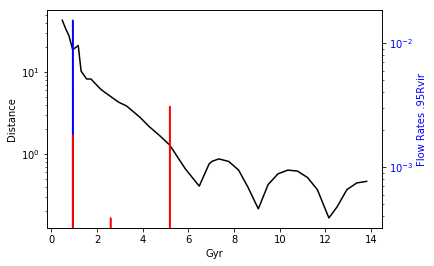

<Figure size 504x360 with 0 Axes>

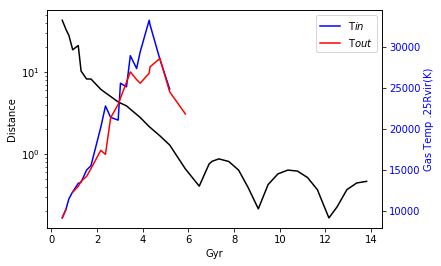

<Figure size 504x360 with 0 Axes>

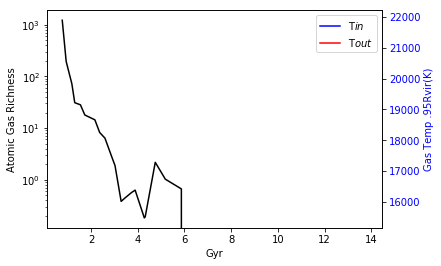

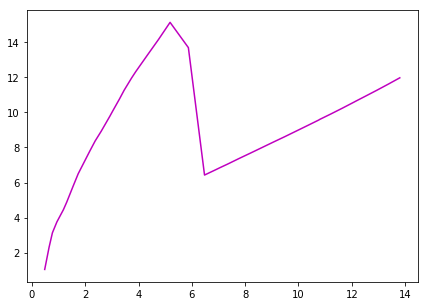

In [39]:
i = 212
print("Halo 212")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_23'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_23'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_91'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_91'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_23'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_23'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['mHI'][datat1['z0haloid']==i]/datat1['mstar'][datat1['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_91'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_91'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat1['time'][datat1['z0haloid']==i], datat1['Rvir'][datat1['z0haloid']==i], c='m')
plt.show()

Halo 265


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

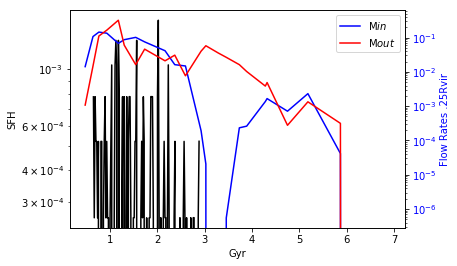

<Figure size 504x360 with 0 Axes>

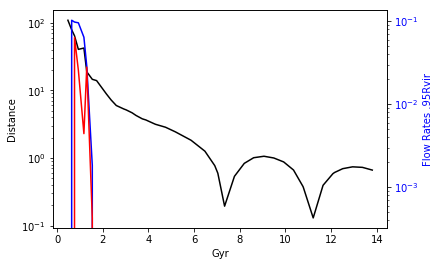

<Figure size 504x360 with 0 Axes>

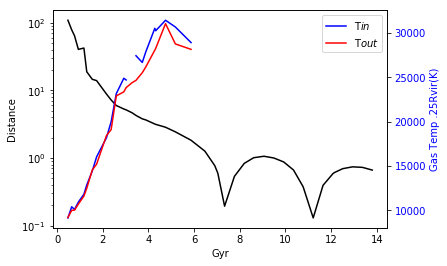

<Figure size 504x360 with 0 Axes>

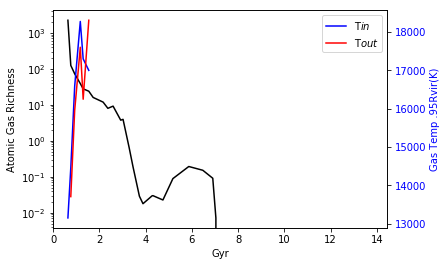

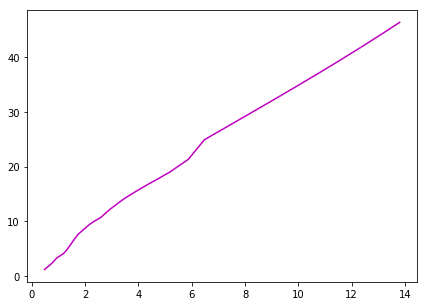

In [40]:
i = 265
print("Halo 265")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_23'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_23'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_91'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_91'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_23'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_23'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['mHI'][datat1['z0haloid']==i]/datat1['mstar'][datat1['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_91'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_91'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat1['time'][datat1['z0haloid']==i], datat1['Rvir'][datat1['z0haloid']==i], c='m')
plt.show()

Halo 278


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

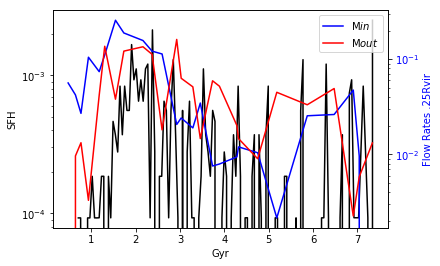

<Figure size 504x360 with 0 Axes>

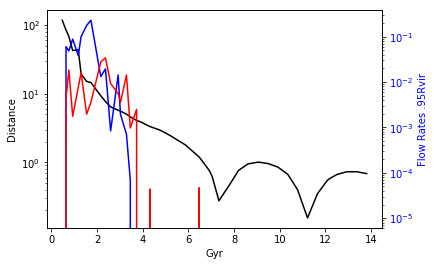

<Figure size 504x360 with 0 Axes>

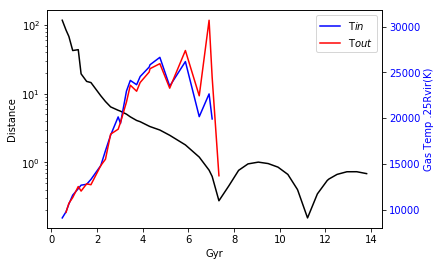

<Figure size 504x360 with 0 Axes>

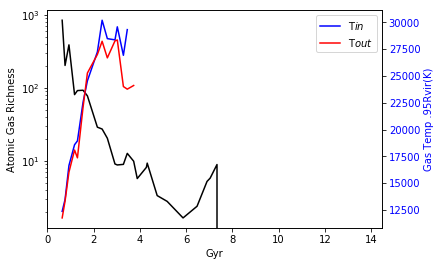

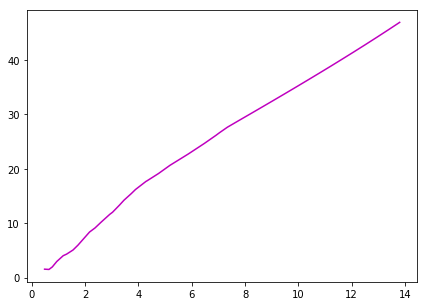

In [41]:
i = 278
print("Halo 278")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_23'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_23'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_91'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_91'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_23'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_23'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['mHI'][datat1['z0haloid']==i]/datat1['mstar'][datat1['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_91'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_91'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat1['time'][datat1['z0haloid']==i], datat1['Rvir'][datat1['z0haloid']==i], c='m')
plt.show()

Halo 283


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

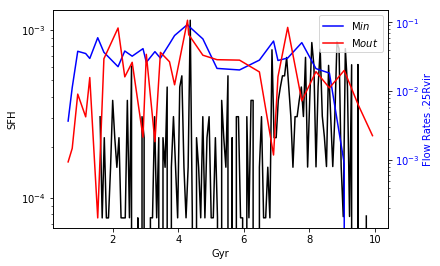

<Figure size 504x360 with 0 Axes>

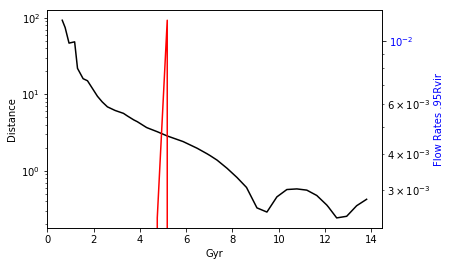

<Figure size 504x360 with 0 Axes>

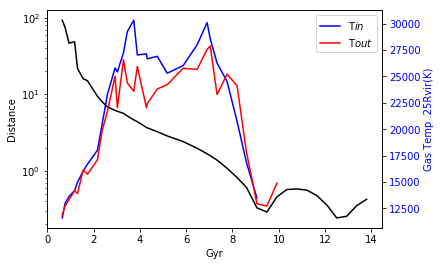

<Figure size 504x360 with 0 Axes>

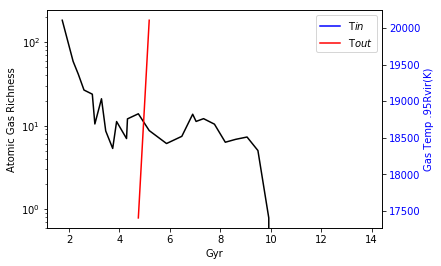

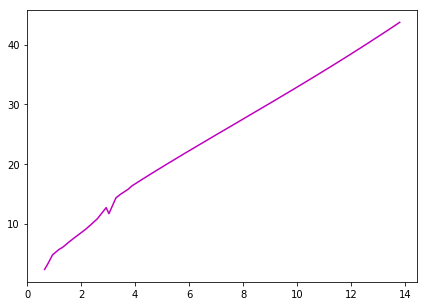

In [42]:
i = 283
print("Halo 283")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_23'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_23'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_91'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_91'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_23'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_23'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['mHI'][datat1['z0haloid']==i]/datat1['mstar'][datat1['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_91'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_91'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat1['time'][datat1['z0haloid']==i], datat1['Rvir'][datat1['z0haloid']==i], c='m')
plt.show()

Halo 329


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

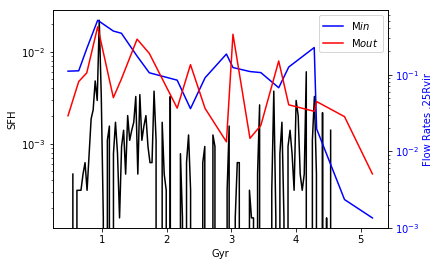

<Figure size 504x360 with 0 Axes>

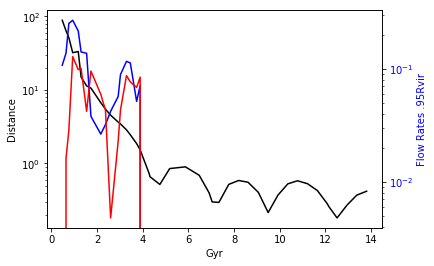

<Figure size 504x360 with 0 Axes>

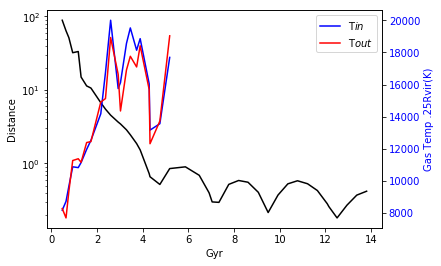

<Figure size 504x360 with 0 Axes>

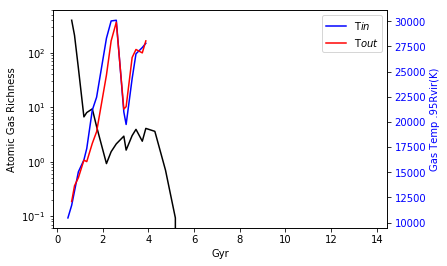

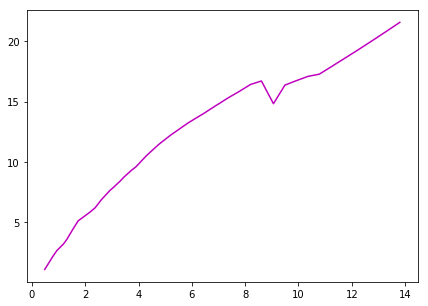

In [43]:
i = 329
print("Halo 329")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_23'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_23'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_91'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_91'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_23'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_23'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['mHI'][datat1['z0haloid']==i]/datat1['mstar'][datat1['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_91'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_91'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat1['time'][datat1['z0haloid']==i], datat1['Rvir'][datat1['z0haloid']==i], c='m')
plt.show()

Halo 386


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

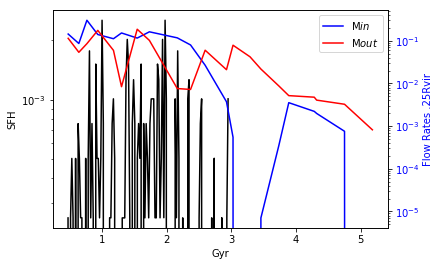

<Figure size 504x360 with 0 Axes>

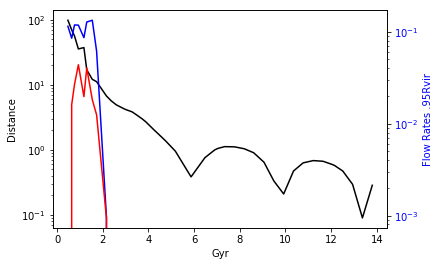

<Figure size 504x360 with 0 Axes>

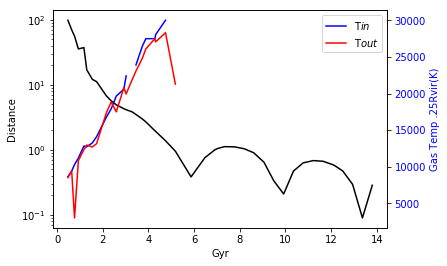

<Figure size 504x360 with 0 Axes>

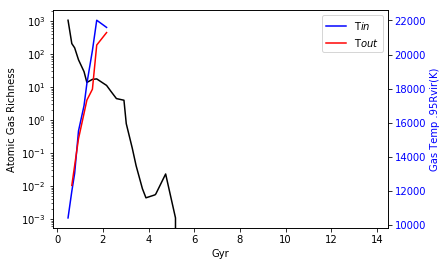

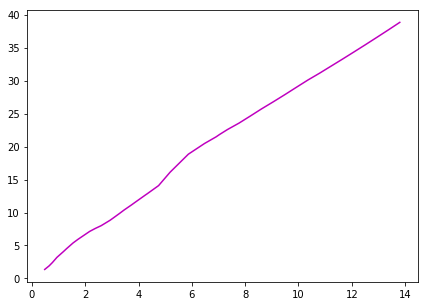

In [46]:
i = 386
print("Halo 386")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_23'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_23'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_91'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_91'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_23'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_23'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['mHI'][datat1['z0haloid']==i]/datat1['mstar'][datat1['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_91'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_91'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat1['time'][datat1['z0haloid']==i], datat1['Rvir'][datat1['z0haloid']==i], c='m')
plt.show()

Halo 442


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

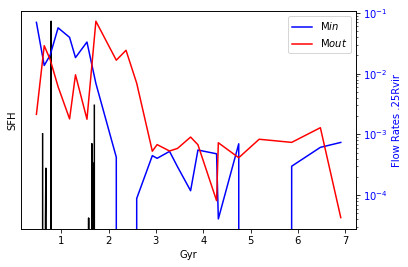

<Figure size 504x360 with 0 Axes>

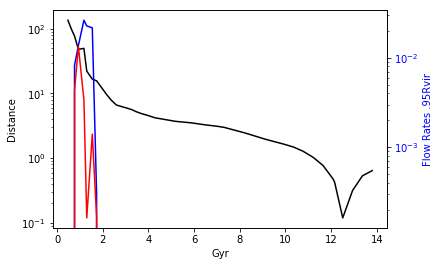

<Figure size 504x360 with 0 Axes>

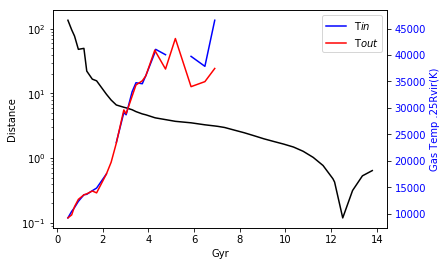

<Figure size 504x360 with 0 Axes>

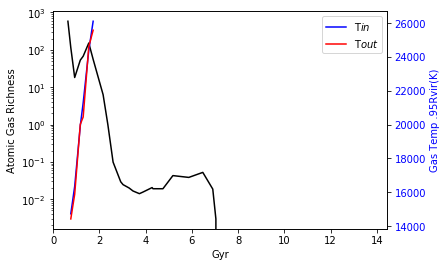

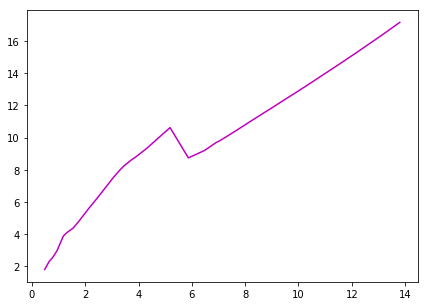

In [47]:
i = 442
print("Halo 442")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_23'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_23'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_91'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_91'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_23'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_23'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['mHI'][datat1['z0haloid']==i]/datat1['mstar'][datat1['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_91'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_91'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat1['time'][datat1['z0haloid']==i], datat1['Rvir'][datat1['z0haloid']==i], c='m')
plt.show()

Halo 678


/home/engelhar/.local/lib/python3.5/site-packages/pynbody/array.py:346: RuntimeWarning: invalid value encountered in true_divide
  return np.ndarray.__truediv__(self, rhs)
/home/engelhar/.local/lib/python3.5/site-packages/matplotlib/ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

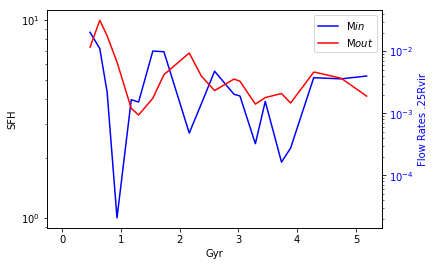

<Figure size 504x360 with 0 Axes>

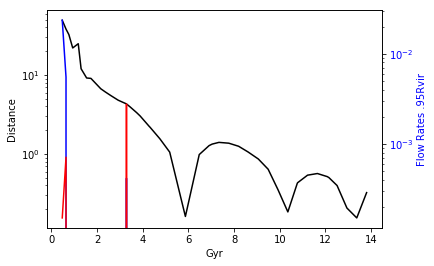

<Figure size 504x360 with 0 Axes>

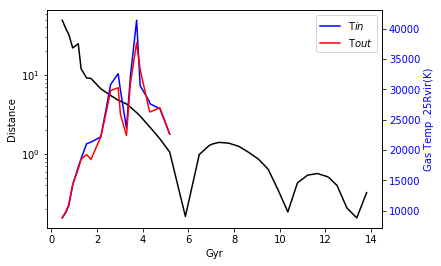

<Figure size 504x360 with 0 Axes>

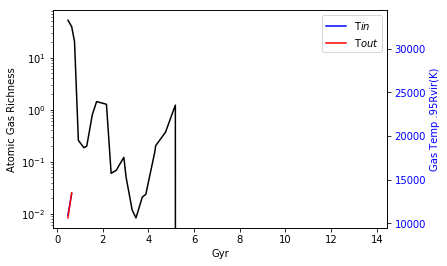

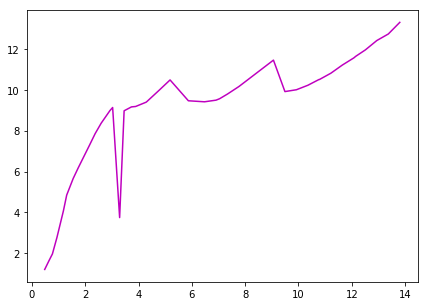

In [50]:
i = 678
print("Halo 678")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_23'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_23'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_91'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_91'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i], c='black')
plt.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_23'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_23'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat1['time'][datat1['z0haloid']==i], datat1['mHI'][datat1['z0haloid']==i]/datat1['mstar'][datat1['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_temp_91'][datat1['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_temp_91'][datat1['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat1['time'][datat1['z0haloid']==i], datat1['Rvir'][datat1['z0haloid']==i], c='m')
plt.show()